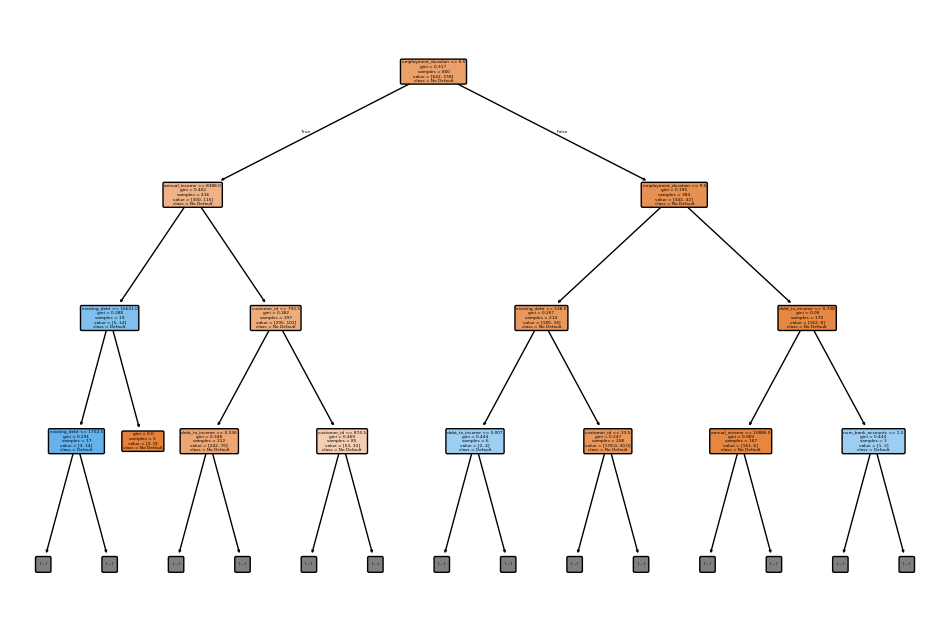

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_sample_data.csv')

X = df.drop('default_status', axis=1)
y = df['default_status']

categorical_cols = ['employment_status', 'education']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_cols.index = X.index
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_cols], axis=1)

X.columns = X.columns.astype(str)

# creating trains heree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No Default', 'Default'],
          filled=True,
          rounded=True,
          max_depth=3) 
plt.show()

   customer_id  age  annual_income  employment_duration  credit_score  \
0            1   45        73106.0                  4.0         459.0   
1            2   38        57659.0                  6.0         563.0   
2            3   47        37414.0                  3.0         608.0   
3            4   58        26279.0                  5.0         838.0   
4            5   37        51488.0                  0.0         705.0   

  employment_status    education  loan_amount  loan_term  existing_debt  \
0         Full-time  High School        15771         48           3927   
1         Full-time     Bachelor        24262         36            511   
2        Unemployed     Bachelor        11225         36           1231   
3         Full-time  High School        22199         12           2071   
4         Full-time     Bachelor        56961         60           1932   

   debt_to_income  late_payments_30_days  late_payments_90_days  \
0           0.054                      0   

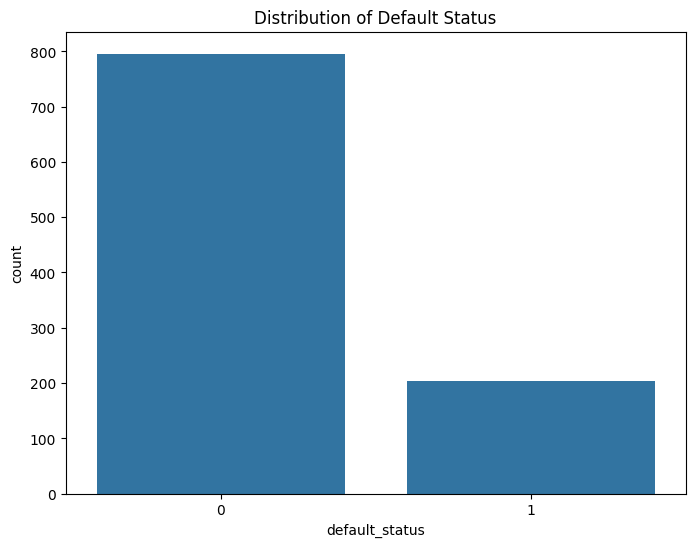

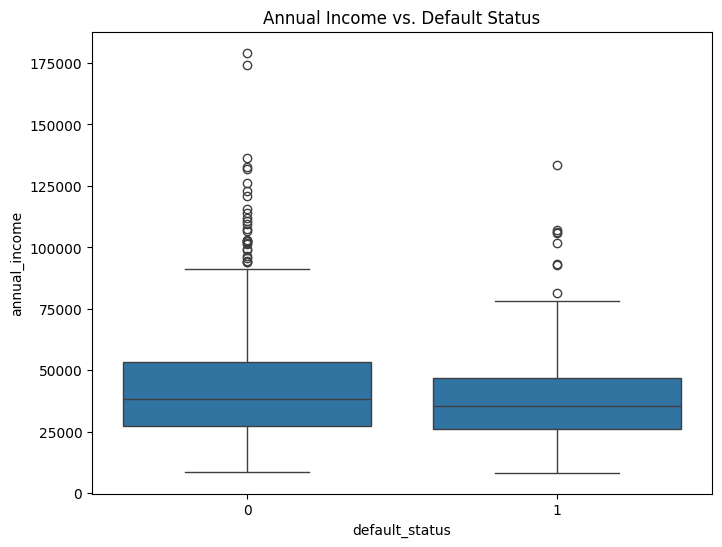

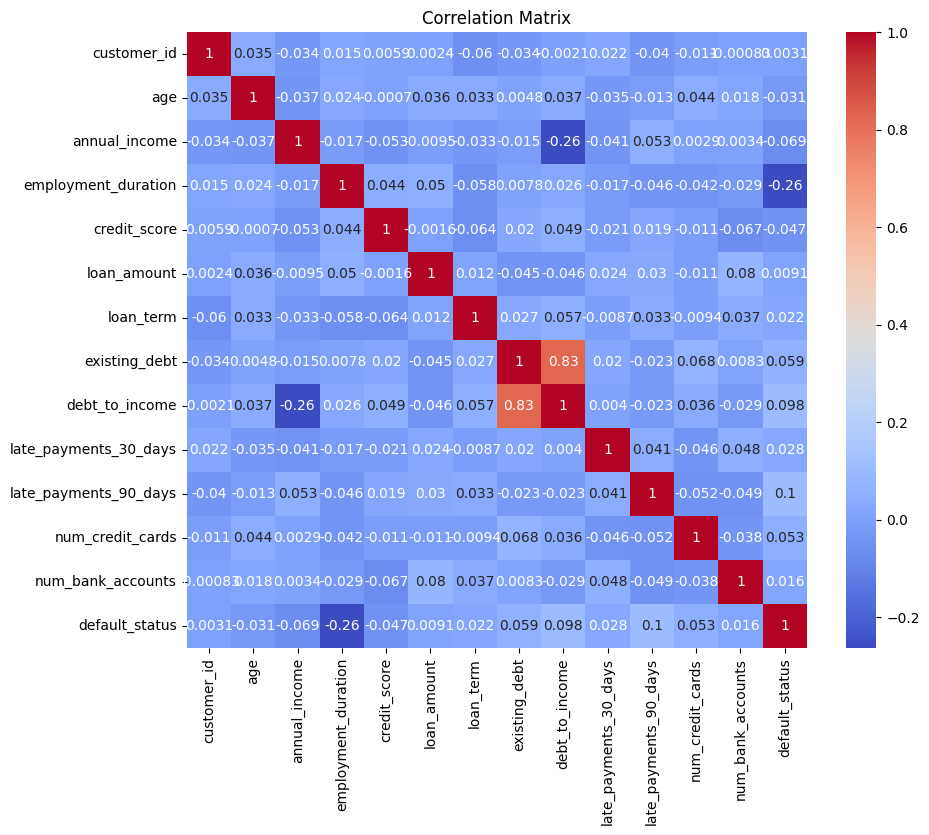

In [15]:
import seaborn as sns

df = pd.read_csv('credit_risk_sample_data.csv')

print(df.head())

print(df.describe())

print(df.isnull().sum())

Q1 = df['annual_income'].quantile(0.25)
Q3 = df['annual_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['annual_income'] < lower_bound) | (df['annual_income'] > upper_bound)]
print("Outliers:")
print(outliers)


plt.figure(figsize=(8, 6))
sns.countplot(x='default_status', data=df)
plt.title('Distribution of Default Status')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='default_status', y='annual_income', data=df)
plt.title('Annual Income vs. Default Status')
plt.show()

# just a correlation matrixx
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score

df = pd.read_csv('credit_risk_sample_data.csv')

X = df.drop('default_status', axis=1)
y = df['default_status']

categorical_cols = ['employment_status', 'education']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_cols.index = X.index
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_cols], axis=1)

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)


clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("the gini accuracy is:", accuracy_gini)
print("the entropy accuracy is:", accuracy_entropy)


the gini accuracy is: 0.66
the entropy accuracy is: 0.655


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('credit_risk_sample_data.csv')

X = df.drop('default_status', axis=1)
y = df['default_status']

categorical_cols = ['employment_status', 'education']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_cols.index = X.index
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_cols], axis=1)
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", accuracy)

# did this to make it easier to access those valuess
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print("here will be displayed best model accuracy:", best_accuracy)
print("best parameters:", best_params)


Initial Model Accuracy: 0.69
here will be displayed best model accuracy: 0.7633333333333333
best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


Confusion Matrix:
 [[184  47]
 [ 51  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       231
           1       0.28      0.26      0.27        69

    accuracy                           0.67       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.67      0.67      0.67       300



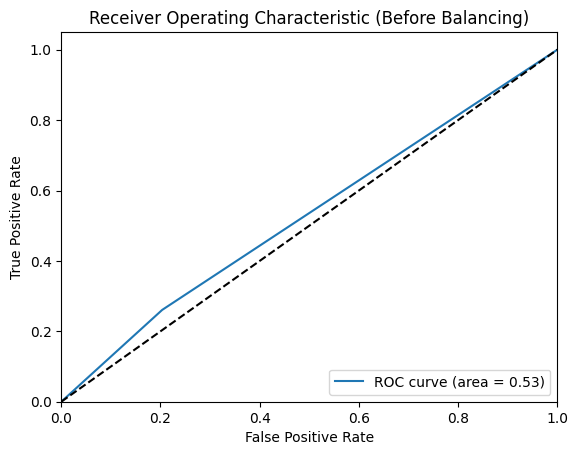


--- Class Weights ---
Confusion Matrix:
 [[187  44]
 [ 53  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       231
           1       0.27      0.23      0.25        69

    accuracy                           0.68       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.66      0.68      0.67       300



In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer 

df = pd.read_csv('credit_risk_sample_data.csv')

X = df.drop('default_status', axis=1)
y = df['default_status']

categorical_cols = ['employment_status', 'education']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_cols.index = X.index
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_cols], axis=1)
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Before Balancing)')
plt.legend(loc="lower right")
plt.show()


clf_weights = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf_weights.fit(X_train, y_train)
y_pred_weights = clf_weights.predict(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
clf_smote = DecisionTreeClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_proba >= 0.4).astype(int)

print("\n--- here will be displayed class weightss ---")
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_weights))
print("\nclassification rreport:\n", classification_report(y_test, y_pred_weights))

so the accuracy before pruning iss: 0.6733333333333333
Accuracy after pre-pruning: 0.77


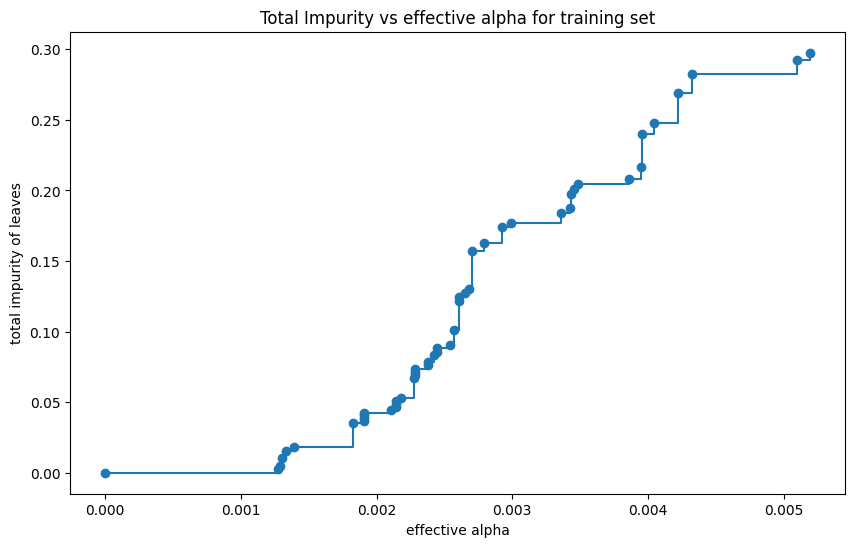

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_sample_data.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("so the accuracy before pruning iss:", accuracy)


clf_prepruned = DecisionTreeClassifier(
    max_depth=5,  
    min_samples_leaf=5,
    min_impurity_decrease=0.01,
    random_state=42
)
clf_prepruned.fit(X_train, y_train)
y_pred_prepruned = clf_prepruned.predict(X_test)
accuracy_prepruned = accuracy_score(y_test, y_pred_prepruned)
print("Accuracy after pre-pruning:", accuracy_prepruned)


path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf_postpruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_postpruned.fit(X_train, y_train)
    clfs.append(clf_postpruned)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()
